Time-Series Prediction
Time series and sequence prediction could be a really amazing to predict/estimate a robot's trajectory which requires temporal data at hand. In this assignemnt we will see how this could be done using Deep Learning.

Given a dataset [link](https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv) for airline passengers prediction problem. Predict the number of international airline passengers in units of 1,000 given a year and a month.
Here is how the data looks like.

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

file_names = ['Rpm40.csv', 'Rpm60.csv', 'Rpm80.csv', 'Rpm100.csv', 'Rpm140.csv','Rpm160.csv'] # dataset path

folder = glob.glob(os.path.join('training', '*.csv'))
input_speeds = [40, 60, 80, 100, 140, 160]

dataframe = []
# Reading data using pandas or csv
for file_name in folder:
  df = pd.read_csv(file_name)
  dataframe.append(df)
print(df.columns)
print(len(dataframe))

Index(['Time', 'Output Speed', 'Weight on bit'], dtype='object')
6


In [13]:
for data in dataframe:
  print(data.head())

    Time  Output Speed  Weight on bit
0  50.00     51.705216     589.850094
1  50.01     53.150475     582.374487
2  50.02     54.776062     570.735495
3  50.03     56.589190     562.479218
4  50.04     58.589987     552.192580
    Time  Output Speed  Weight on bit
0  50.00    180.945390     482.646481
1  50.01    180.808293     522.798088
2  50.02    178.335905     552.593260
3  50.03    173.800587     591.189078
4  50.04    167.709766     608.817869
    Time  Output Speed  Weight on bit
0  50.00    128.146363     540.136942
1  50.01    117.048326     561.951999
2  50.02    104.686813     587.925601
3  50.03     91.929378     597.023409
4  50.04     79.861253     603.154977
    Time  Output Speed  Weight on bit
0  50.00    125.518922     468.163337
1  50.01    133.573073     449.086239
2  50.02    142.162345     437.610829
3  50.03    150.625272     422.252976
4  50.04    158.286405     427.989533
    Time  Output Speed  Weight on bit
0  50.00    108.350680     450.541721
1  50.01    

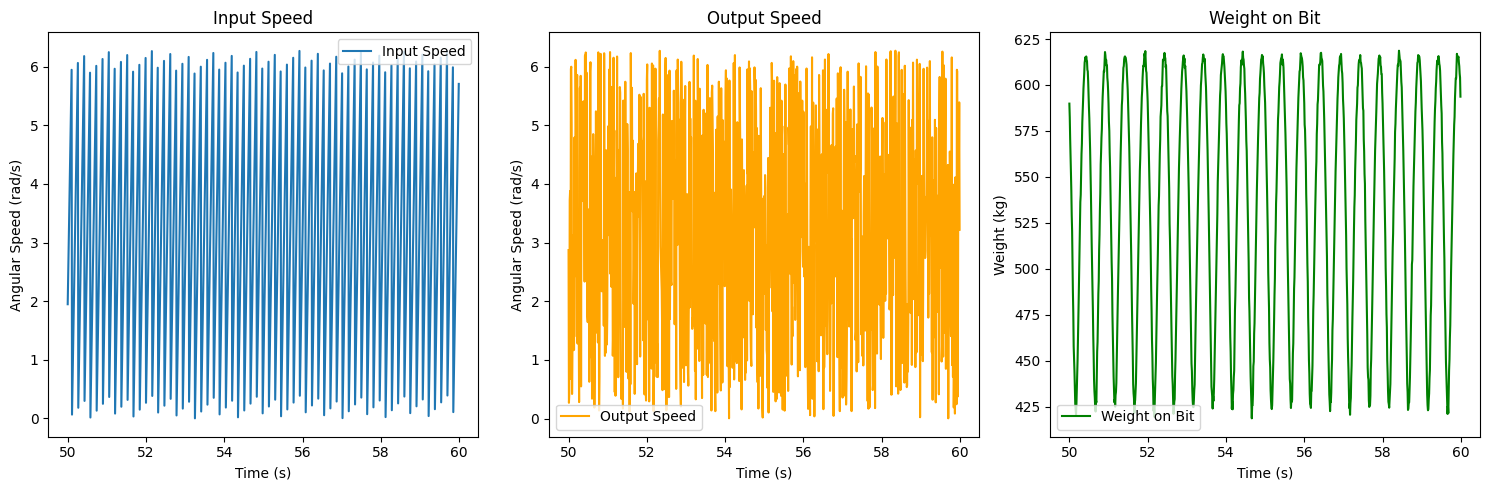

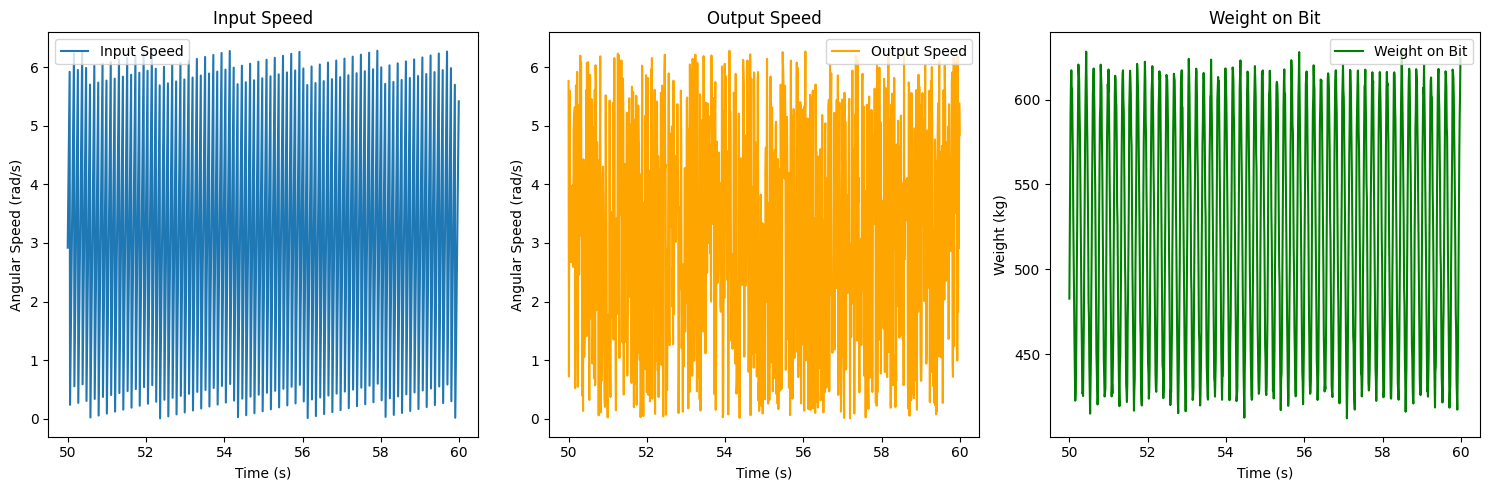

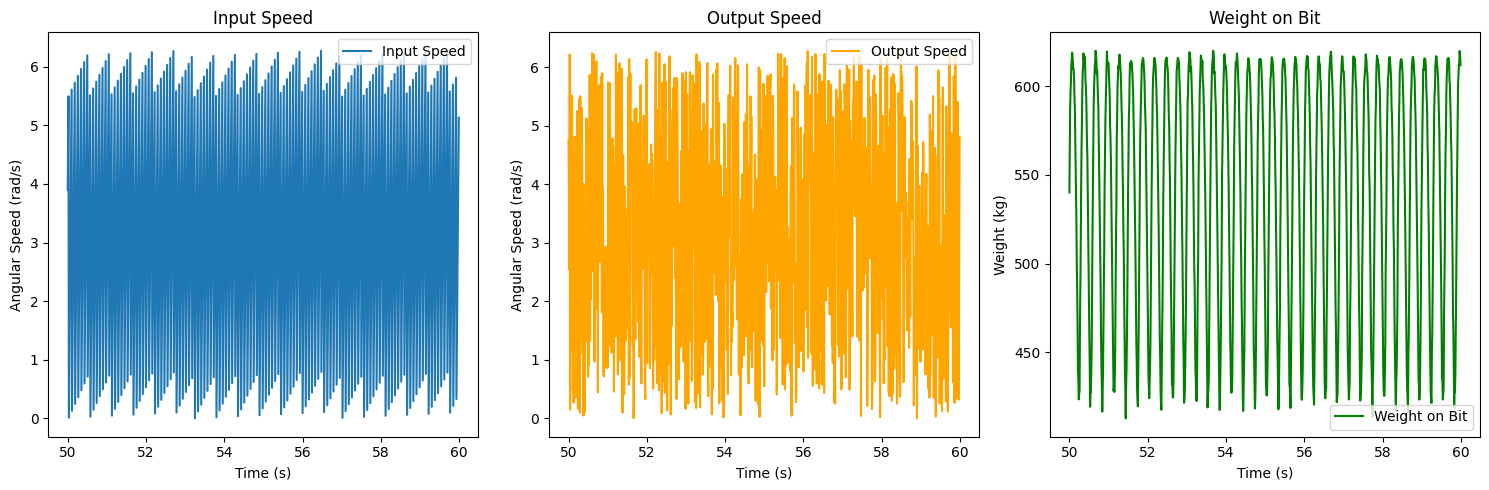

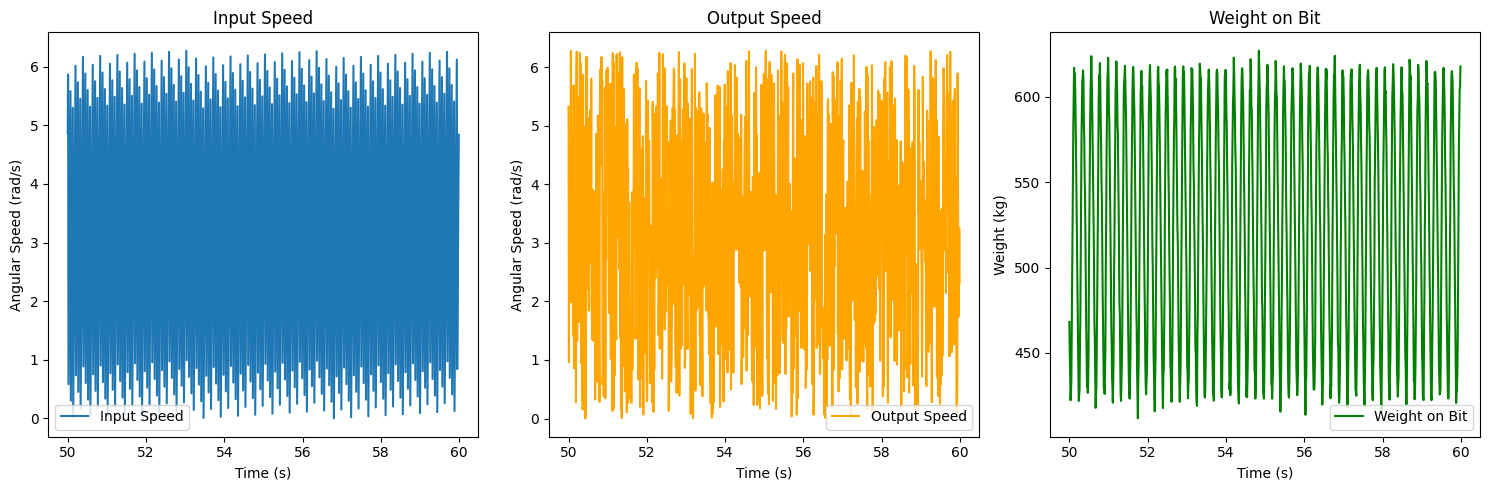

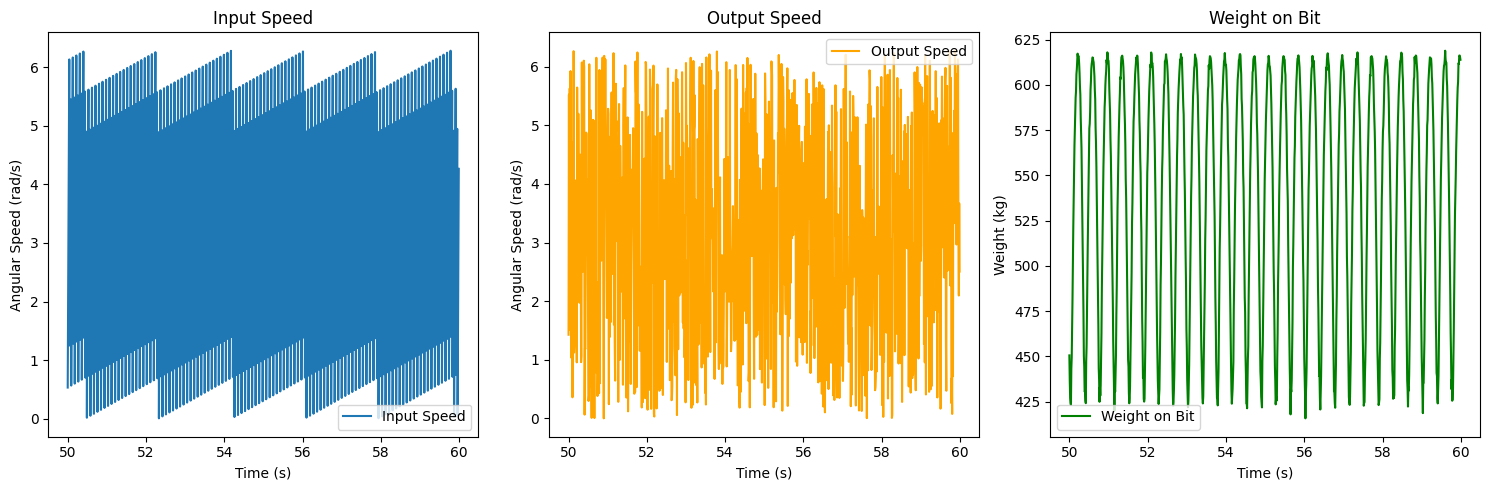

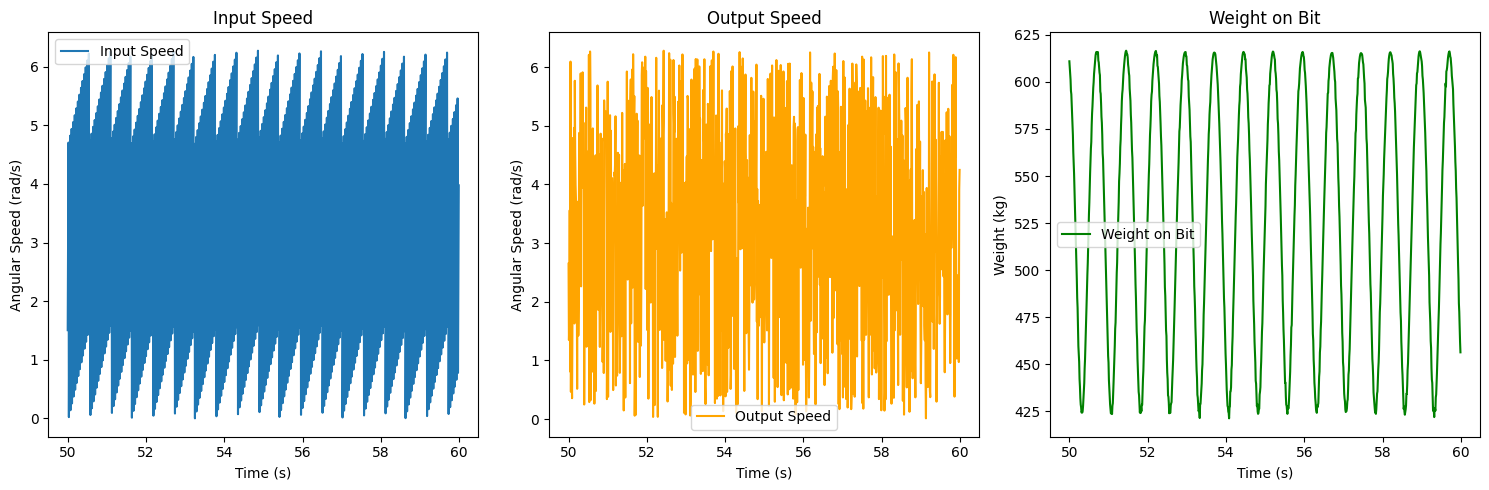

In [43]:
import numpy as np
for df, input_speed in zip(dataframe, input_speeds):
  time = df[["Time"]].values.astype('float32')

  output_speed = df[["Output Speed"]].values.astype('float32')

  output_theta = np.mod(output_speed*time, 2*np.pi)

  inputs = np.full(len(output_speed), input_speed).astype('float32')
  inputs = inputs.reshape(len(inputs), 1)
  # print(inputs.shape)

  df["Input Speed"] = inputs

  input_theta = np.mod(inputs*time, 2*np.pi)

  # display = np.concatenate((output_theta, output_speed, time), axis=1)

  # print(display.shape)

  weight_on_bit = df[["Weight on bit"]].values.astype('float32')

  upto = 1000
  output_speed = output_speed[:upto]
  weight_on_bit = weight_on_bit[:upto]
  output_theta = output_theta[:upto]
  time = time[:upto]
  inputs = inputs[:upto]
  input_theta = input_theta[:upto]

  # Plot the dataset
  fig, axs = plt.subplots(1, 3, figsize=(15, 5))

  # Plot Output Speed
  axs[0].plot(time, input_theta, label= 'Input Speed')
  axs[0].set_title('Input Speed')
  axs[0].set_xlabel('Time (s)')
  axs[0].set_ylabel('Angular Speed (rad/s)')
  axs[0].legend()

  # Plot Input Speed
  axs[1].plot(time, output_theta, label='Output Speed', color='orange')
  axs[1].set_title('Output Speed')
  axs[1].set_xlabel('Time (s)')
  axs[1].set_ylabel('Angular Speed (rad/s)')
  axs[1].legend()

  # Plot Weight on Bit
  axs[2].plot(time, weight_on_bit, label='Weight on Bit', color='green')
  axs[2].set_title('Weight on Bit')
  axs[2].set_xlabel('Time (s)')
  axs[2].set_ylabel('Weight (kg)')
  axs[2].legend()

  # Adjust layout and show the plots
  plt.tight_layout()
  plt.show()

# **Pytorch LSTM Implementation**


# Pre-Processing the Training Data

In [45]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

features = []

for filename, input_speed in zip(file_names, input_speeds):

  # plotting the dataset
  time = df[["Time"]].values.astype('float32')
  output_speed = df[["Output Speed"]].values.astype('float32')
  # print(output_speed.shape)

  inputs = np.full(len(output_speed), input_speed, dtype=np.float32)
  inputs = inputs.reshape(len(inputs), 1)
  # print(inputs.shape)
  df["Input Speed"] = inputs
  
  weight_on_bit = df[["Weight on bit"]].values.astype('float32')

  upto = 1000
  output_speed = output_speed[:upto]
  weight_on_bit = weight_on_bit[:upto]
  time = time[:upto]
  inputs = inputs[:upto]
  output_theta = output_theta[:upto]
  input_theta = input_theta[:upto]

  features.append(np.concatenate((np.array(input_theta), np.array(output_theta), np.array(weight_on_bit)), axis=1))

features = np.array(features)

# print(features)
features = np.reshape(features,  ((features.shape[0]*features.shape[1]), features.shape[2]))
print(features.shape)

from sklearn.preprocessing import MinMaxScaler
feature_scaler = MinMaxScaler(feature_range=(0,1))
scaled_features = feature_scaler.fit_transform(features)

# Convert the NumPy array to a PyTorch tensor
Training_set = torch.from_numpy(scaled_features)

print("=================Creating_Dataset==================\n", Training_set.shape, "\n")

set_to_scale_features = []
set_to_scale_labels = []

# # Loop through the array to create the feature and label sets
for i in range(30, Training_set.shape[0]):
    set_to_scale_features.append(Training_set[i-30:i, [0]].cpu().numpy())
    set_to_scale_labels.append(Training_set[i, [1, 2]].cpu().numpy())

# # Convert lists to NumPy arrays
set_to_scale_features = np.array(set_to_scale_features)
set_to_scale_labels = np.array(set_to_scale_labels)


print("=================Creating Features and Labels==================\n", set_to_scale_features.shape, "\n", set_to_scale_labels.shape, "\n" )

# # Reshape the feature set
X_train = torch.from_numpy(set_to_scale_features)

# # Convert labels to PyTorch tensor
Y_train = torch.from_numpy(set_to_scale_labels.reshape(set_to_scale_labels.shape[0], 2))

print("=================Converting Features and Labels to Tensors==================\n", X_train.shape, "\n", Y_train.shape, "\n" )

# print(X_train)

(6000, 3)
=================Creating_Dataset==================
 torch.Size([6000, 3]) 

=================Creating Features and Labels==================
 (5900, 100, 1) 
 (5900, 2) 

=================Converting Features and Labels to Tensors==================
 torch.Size([5900, 100, 1]) 
 torch.Size([5900, 2]) 



In [46]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

# xy = np.loadtxt('testing/TestingRpm120.csv', delimiter=",", dtype=np.object_, skiprows=1)

# # Convert the data to a 2D NumPy array of floats
# xy = np.array(xy[:1000, 1:], dtype=np.float32)

# inputs = np.full(len(xy), 120, dtype=np.float32)
# inputs = inputs.reshape(len(inputs), 1)

# test_features = np.concatenate((inputs, xy), axis=1)

df = pd.read_csv('testing/TestingRpm120.csv')
time = df[["Time"]].values.astype('float32')
output_speed = df[["Output Speed"]].values.astype('float32')
weight_on_bit = df[["Weight on bit"]].values.astype('float32')

inputs = np.full(len(output_speed), 120, dtype=np.float32)
inputs = inputs.reshape(len(inputs), 1)
df["Input Speed"] = inputs

output_theta = np.mod(output_speed*time, 2*np.pi)
input_theta = np.mod(inputs*time, 2*np.pi)

upto = 1000
output_speed = output_speed[:upto]
weight_on_bit = weight_on_bit[:upto]
time = time[:upto]
inputs = inputs[:upto]
output_theta = output_theta[:upto]
input_theta = input_theta[:upto]

test_features = np.concatenate((np.array(input_theta), np.array(output_theta), np.array(weight_on_bit)), axis=1)

# print(test_features)
# print(test_features.shape)
scaled_test_features = feature_scaler.transform(test_features)

# Convert the NumPy array to a PyTorch tensor
Testing_set = torch.from_numpy(scaled_test_features).to(device)

print("=================Creating_Dataset==================\n", Testing_set.shape, "\n")

set_to_scale_test_features = []
set_to_scale_test_labels = []

# # Loop through the array to create the feature and label sets
for i in range(30, Testing_set.shape[0]):
    set_to_scale_test_features.append(Testing_set[i-30:i, [0]].cpu().numpy())
    set_to_scale_test_labels.append(Testing_set[i, [1, 2]].cpu().numpy())

# # Convert lists to NumPy arrays
set_to_scale_test_features = np.array(set_to_scale_test_features)
set_to_scale_test_labels = np.array(set_to_scale_test_labels)


print("=================Creating Features and Labels==================\n", set_to_scale_test_features.shape, "\n", set_to_scale_test_labels.shape, "\n" )

# # Reshape the feature set
X_test = torch.from_numpy(set_to_scale_test_features)

# # Convert labels to PyTorch tensor
Y_test = torch.from_numpy(set_to_scale_test_labels.reshape(set_to_scale_test_labels.shape[0], 2))

print("=================Converting Features and Labels to Tensors==================\n", X_test.shape, "\n", Y_test.shape, "\n" )

# print(X_test)

=================Creating_Dataset==================
 torch.Size([1000, 3]) 

=================Creating Features and Labels==================
 (900, 100, 1) 
 (900, 2) 

=================Converting Features and Labels to Tensors==================
 torch.Size([900, 100, 1]) 
 torch.Size([900, 2]) 



In [47]:
# # Creating dataset objects to process nn data through pytorch
from torch.utils.data import Dataset

class TSA(Dataset):
  def __init__(self, X, Y):
    self.X = X
    self.Y = Y

  def __getitem__(self, index) :
    return self.X[index], self.Y[index]

  def __len__(self):
    return len(self.X)

train_dataset = TSA(X_train, Y_train)
test_dataset = TSA(X_test, Y_test)

# train_dataset

# # Using data_loader to classify data in required format
from torch.utils.data import DataLoader

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# # Print the batch sizes to confirm
for _, batch in enumerate(train_loader):
  x_batch, y_batch = batch[0].to(device), batch[1].to(device)
  print(x_batch.shape, y_batch.shape)
  break

torch.Size([32, 100, 1]) torch.Size([32, 2])


# LSTM Training

In [48]:
import numpy as np
import torch
import torch.nn as nn

# Define the hyperparameters
input_size = 1
hidden_size = 120
num_stacked_layers = 5
fc_size1 = 140
fc_size2 = 280
fc_size3 = 360
output_size = 2
dropout = 0.1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class ResidualLSTM(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.residual = nn.Linear(input_size, hidden_size) if input_size != hidden_size else nn.Identity()

    def forward(self, x):
        residual = self.residual(x)
        out, (hn, cn) = self.lstm(x)
        return out + residual, (hn, cn)

class ResidualFC(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.fc = nn.Linear(in_features, out_features)
        self.residual = nn.Linear(in_features, out_features) if in_features != out_features else nn.Identity()
        self.relu = nn.ReLU()

    def forward(self, x):
        residual = self.residual(x)
        out = self.fc(x)
        return self.relu(out + residual)

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers, dropout, output_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        # Stacked LSTM layers with residual connections
        self.lstm_layers = nn.ModuleList([
            ResidualLSTM(input_size if i == 0 else hidden_size, hidden_size)
            for i in range(num_stacked_layers)
        ])

        self.dropout = nn.Dropout(dropout)

        # Attention mechanism
        self.attention = nn.Sequential(
            nn.Linear(hidden_size, 1),
            nn.Tanh()
        )

        # Separate fully connected layers for each output with residual connections
        self.fc_output1 = nn.Sequential(
            ResidualFC(hidden_size, fc_size1),
            ResidualFC(fc_size1, fc_size2),
            ResidualFC(fc_size2, fc_size3),
            nn.Linear(fc_size3, 1)
        )

        self.fc_output2 = nn.Sequential(
            ResidualFC(hidden_size, fc_size1),
            ResidualFC(fc_size1, fc_size2),
            ResidualFC(fc_size2, fc_size3),
            nn.Linear(fc_size3, 1)
        )

    def forward(self, x):
        # Process through LSTM layers
        for lstm_layer in self.lstm_layers:
            x, _ = lstm_layer(x)

        # Apply attention mechanism
        attention_weights = self.attention(x).squeeze(-1)
        attention_weights = torch.softmax(attention_weights, dim=1)
        x_weighted = torch.sum(x * attention_weights.unsqueeze(-1), dim=1)

        x = self.dropout(x_weighted)

        # Apply separate fully connected layers for each output
        output1 = self.fc_output1(x)
        output2 = self.fc_output2(x)

        # Concatenate the outputs
        return torch.cat((output1, output2), dim=1)

# Initialize the model
model = LSTMModel(input_size, hidden_size, num_stacked_layers, dropout, output_size=output_size)
model.to(device)

# Print model summary
print(model)

LSTMModel(
  (lstm_layers): ModuleList(
    (0): ResidualLSTM(
      (lstm): LSTM(1, 120, batch_first=True)
      (residual): Linear(in_features=1, out_features=120, bias=True)
    )
    (1-4): 4 x ResidualLSTM(
      (lstm): LSTM(120, 120, batch_first=True)
      (residual): Identity()
    )
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (attention): Sequential(
    (0): Linear(in_features=120, out_features=1, bias=True)
    (1): Tanh()
  )
  (fc_output1): Sequential(
    (0): ResidualFC(
      (fc): Linear(in_features=120, out_features=140, bias=True)
      (residual): Linear(in_features=120, out_features=140, bias=True)
      (relu): ReLU()
    )
    (1): ResidualFC(
      (fc): Linear(in_features=140, out_features=280, bias=True)
      (residual): Linear(in_features=140, out_features=280, bias=True)
      (relu): ReLU()
    )
    (2): ResidualFC(
      (fc): Linear(in_features=280, out_features=360, bias=True)
      (residual): Linear(in_features=280, out_features=360, bias=True)

In [49]:
import torch.optim as optim
learning_rate = 0.001
num_epochs = 50

best_val_loss = float('inf')
patience = 10
counter = 0

val_loss_list = []

# Define your loss function
loss_function = nn.MSELoss()

# Define your optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Running epochs
for epoch in range(num_epochs):
    # Set model to training mode
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # print(batch_index)
        if batch_index % 2 == 1:
          avg_loss_across_batches = running_loss / 100
          print('Batch {0}, Loss: {1: .6f}, Epoch: {2}'.format(batch_index+1, avg_loss_across_batches, epoch+1))

    # Validate every epoch
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
          output = model(x_batch)
          loss = loss_function(output, y_batch)
          running_loss += loss

    val_loss = running_loss / len(test_loader)
    print('Validation Loss {0: .3f}'.format(val_loss))

    print('###################################################')

    running_loss = 0.0

    val_loss_list.append(val_loss)
    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping")
            print(val_loss_list)
            print("Best_Validation_Loss", best_val_loss)
            break


Epoch: 1
Batch 2, Loss:  0.002599, Epoch: 1
Batch 4, Loss:  0.019060, Epoch: 1
Batch 6, Loss:  0.021739, Epoch: 1
Batch 8, Loss:  0.025148, Epoch: 1
Batch 10, Loss:  0.028515, Epoch: 1
Batch 12, Loss:  0.030757, Epoch: 1
Batch 14, Loss:  0.032472, Epoch: 1
Batch 16, Loss:  0.035148, Epoch: 1
Batch 18, Loss:  0.037378, Epoch: 1
Batch 20, Loss:  0.039408, Epoch: 1
Batch 22, Loss:  0.041684, Epoch: 1
Batch 24, Loss:  0.044183, Epoch: 1
Batch 26, Loss:  0.045887, Epoch: 1
Batch 28, Loss:  0.047665, Epoch: 1
Batch 30, Loss:  0.049895, Epoch: 1
Batch 32, Loss:  0.052009, Epoch: 1
Batch 34, Loss:  0.054021, Epoch: 1
Batch 36, Loss:  0.055786, Epoch: 1
Batch 38, Loss:  0.058187, Epoch: 1
Batch 40, Loss:  0.060381, Epoch: 1
Batch 42, Loss:  0.062352, Epoch: 1
Batch 44, Loss:  0.064191, Epoch: 1
Batch 46, Loss:  0.066504, Epoch: 1
Batch 48, Loss:  0.068489, Epoch: 1
Batch 50, Loss:  0.070149, Epoch: 1
Batch 52, Loss:  0.072526, Epoch: 1
Batch 54, Loss:  0.074766, Epoch: 1
Batch 56, Loss:  0.0766

# LSTM Plotting

In [50]:
# Save the model
model_save_path = 'model.pth'
torch.save(model.state_dict(), model_save_path)

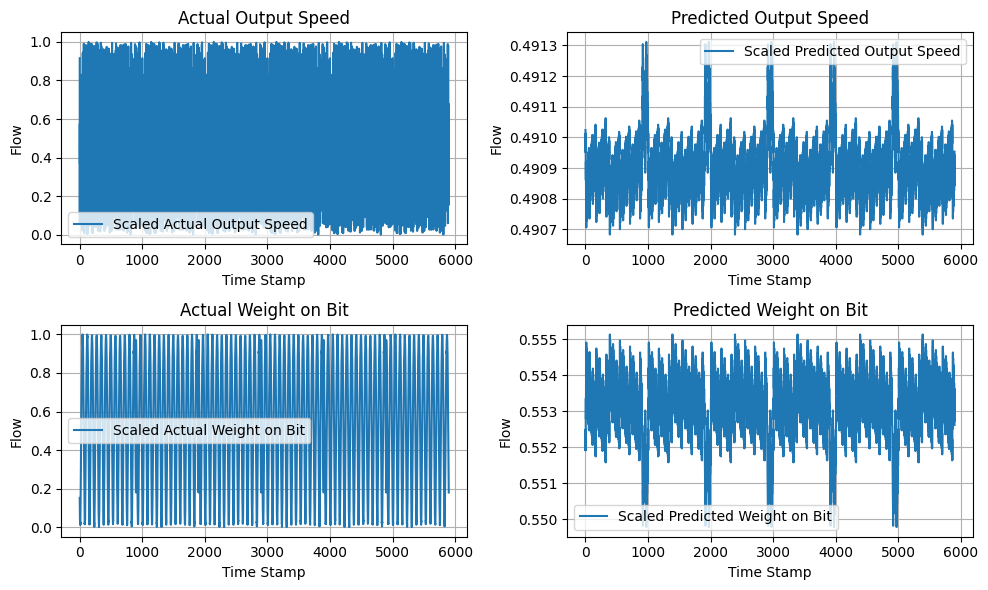

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize predictions and actual values storage
actual_data = []
predicted_data = []

for batch_index, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)

    with torch.no_grad():
        predicted = model(x_batch).to('cpu').numpy()

    actual_data.append(y_batch.to('cpu').numpy())
    predicted_data.append(predicted)

# Convert lists to numpy arrays for plotting
actual_data = np.concatenate(actual_data, axis=0)
predicted_data = np.concatenate(predicted_data, axis=0)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# First subplot - Actual Output Speed
axs[0, 0].plot(actual_data[:, 0], label='Scaled Actual Output Speed')
axs[0, 0].set_title('Actual Output Speed')
axs[0, 0].set_xlabel('Time Stamp')
axs[0, 0].set_ylabel('Flow')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Second subplot - Predicted Output Speed
axs[0, 1].plot(predicted_data[:, 0], label='Scaled Predicted Output Speed')
axs[0, 1].set_title('Predicted Output Speed')
axs[0, 1].set_xlabel('Time Stamp')
axs[0, 1].set_ylabel('Flow')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Third subplot - Actual Weight on Bit
axs[1, 0].plot(actual_data[:, 1], label='Scaled Actual Weight on Bit')
axs[1, 0].set_title('Actual Weight on Bit')
axs[1, 0].set_xlabel('Time Stamp')
axs[1, 0].set_ylabel('Flow')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Fourth subplot - Predicted Weight on Bit
axs[1, 1].plot(predicted_data[:, 1], label='Scaled Predicted Weight on Bit')
axs[1, 1].set_title('Predicted Weight on Bit')
axs[1, 1].set_xlabel('Time Stamp')
axs[1, 1].set_ylabel('Flow')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


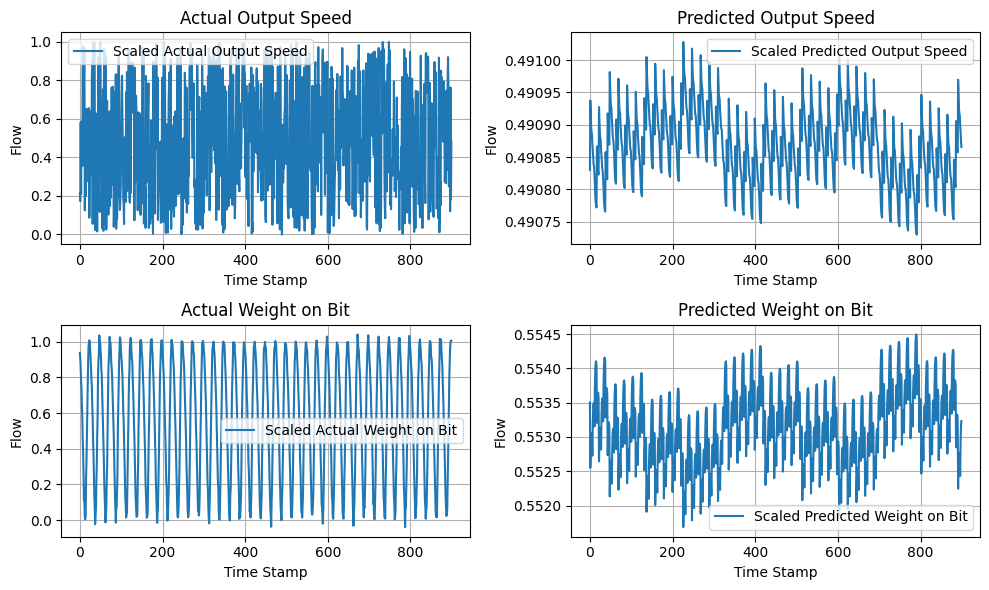

In [52]:

import matplotlib.pyplot as plt
import numpy as np

# Initialize predictions and actual values storage
actual_data = []
predicted_data = []

for batch_index, batch in enumerate(test_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)

    with torch.no_grad():
        predicted = model(x_batch).to('cpu').numpy()

    actual_data.append(y_batch.to('cpu').numpy())
    predicted_data.append(predicted)

# Convert lists to numpy arrays for plotting
actual_data = np.concatenate(actual_data, axis=0)
predicted_data = np.concatenate(predicted_data, axis=0)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# First subplot - Actual Output Speed
axs[0, 0].plot(actual_data[:, 0], label='Scaled Actual Output Speed')
axs[0, 0].set_title('Actual Output Speed')
axs[0, 0].set_xlabel('Time Stamp')
axs[0, 0].set_ylabel('Flow')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Second subplot - Predicted Output Speed
axs[0, 1].plot(predicted_data[:, 0], label='Scaled Predicted Output Speed')
axs[0, 1].set_title('Predicted Output Speed')
axs[0, 1].set_xlabel('Time Stamp')
axs[0, 1].set_ylabel('Flow')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Third subplot - Actual Weight on Bit
axs[1, 0].plot(actual_data[:, 1], label='Scaled Actual Weight on Bit')
axs[1, 0].set_title('Actual Weight on Bit')
axs[1, 0].set_xlabel('Time Stamp')
axs[1, 0].set_ylabel('Flow')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Fourth subplot - Predicted Weight on Bit
axs[1, 1].plot(predicted_data[:, 1], label='Scaled Predicted Weight on Bit')
axs[1, 1].set_title('Predicted Weight on Bit')
axs[1, 1].set_xlabel('Time Stamp')
axs[1, 1].set_ylabel('Flow')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


## Loading the model and furnishing the output data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize predictions and actual values storage
actual_data = []
predicted_data = []

# Define the hyperparameters
input_size = 2
hidden_size = 70
num_stacked_layers = 3
output_size = 2

# Initialize the model
model = LSTMModel(input_size, hidden_size, num_stacked_layers, dropout=0.0, output_size=output_size)

model_path = "model (3).pth"

model.load_state_dict(torch.load(model_path))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

model.eval()


FileNotFoundError: [Errno 2] No such file or directory: 'model (3).pth'

In [ ]:
for batch_index, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)

    with torch.no_grad():
        predicted = model(x_batch).to('cpu').numpy()

    actual_data.append(y_batch.to('cpu').numpy())
    predicted_data.append(predicted)

# Convert lists to numpy arrays for plotting
actual_data = np.concatenate(actual_data, axis=0)
predicted_data = np.concatenate(predicted_data, axis=0)

print("Actual_Data_shape", actual_data.shape, "Predicted_Data_shape", predicted_data.shape)

Actual_Data_shape (52970, 2) Predicted_Data_shape (52970, 2)


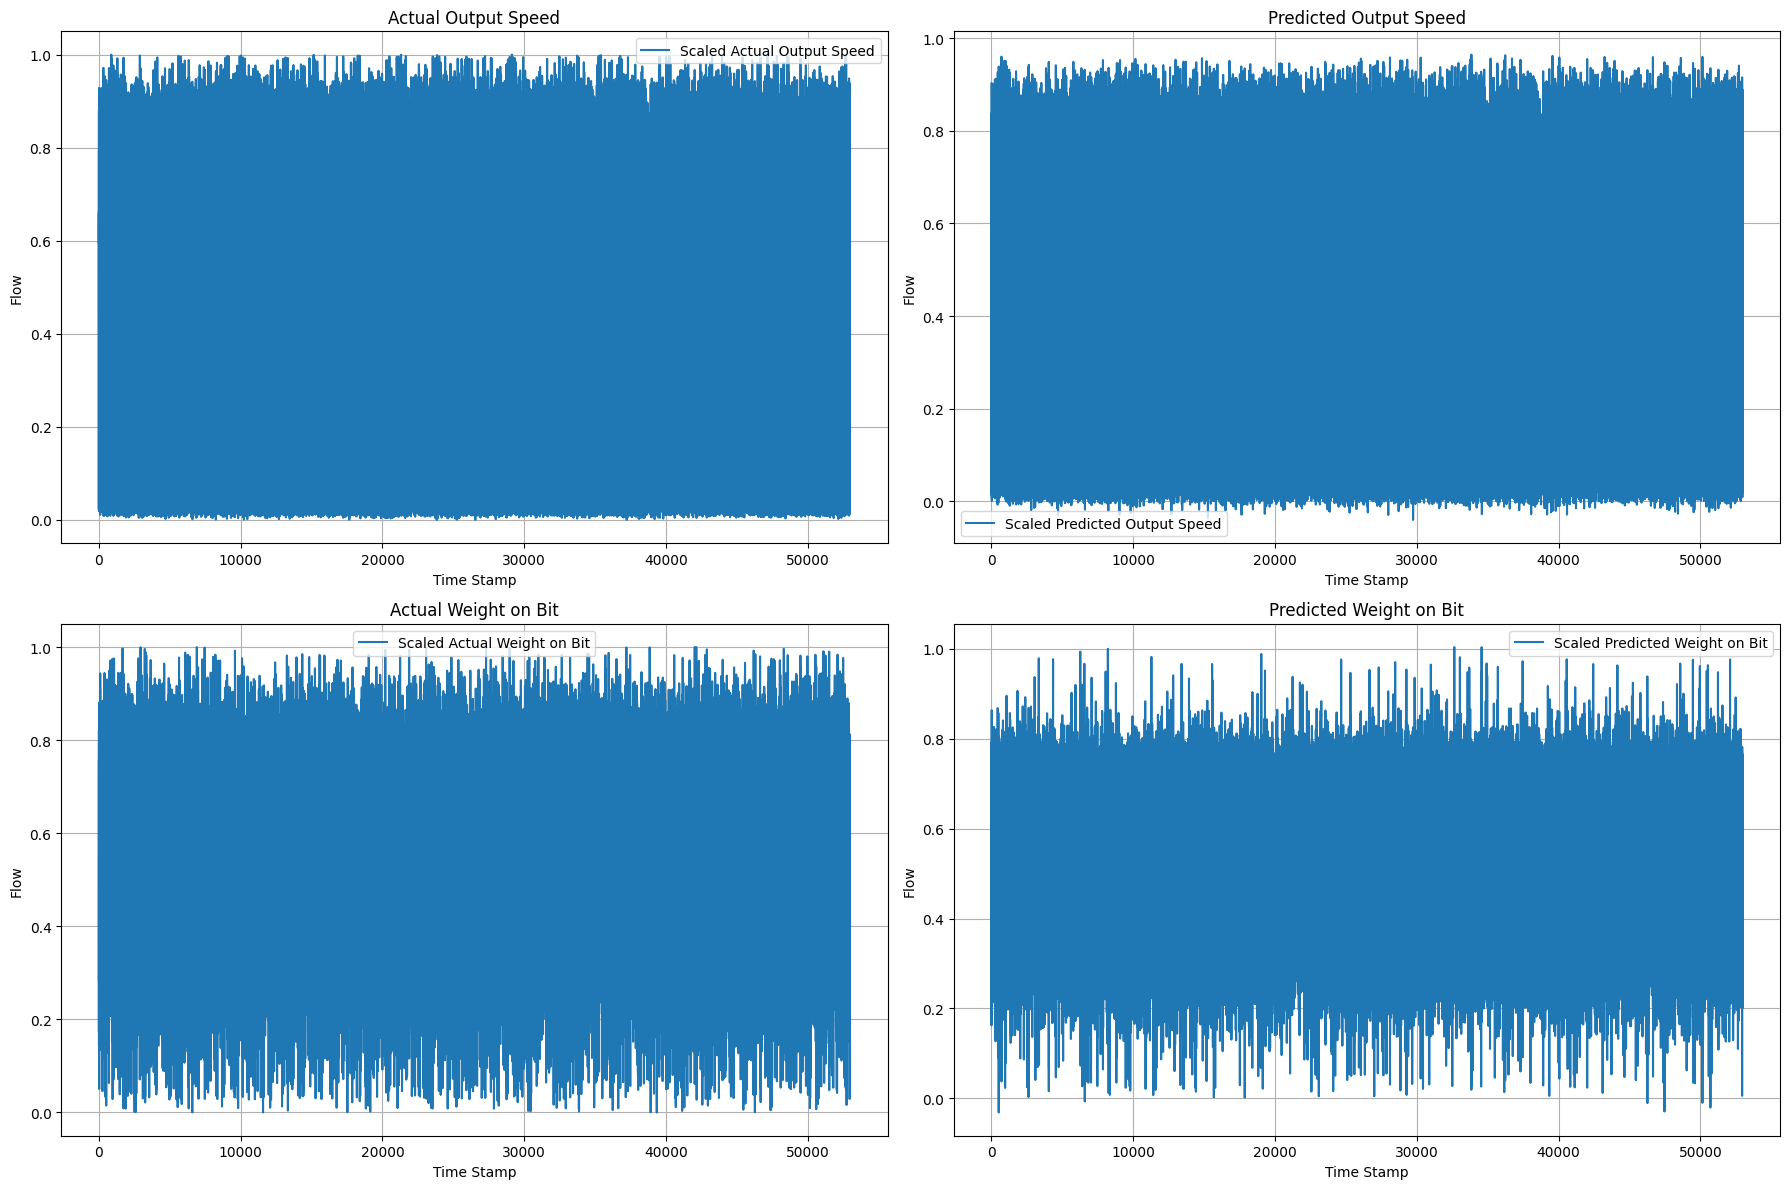

In [ ]:

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# First subplot - Actual Output Speed
axs[0, 0].plot(actual_data[:, 0], label='Scaled Actual Output Speed')
axs[0, 0].set_title('Actual Output Speed')
axs[0, 0].set_xlabel('Time Stamp')
axs[0, 0].set_ylabel('Flow')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Second subplot - Predicted Output Speed
axs[0, 1].plot(predicted_data[:, 0], label='Scaled Predicted Output Speed')
axs[0, 1].set_title('Predicted Output Speed')
axs[0, 1].set_xlabel('Time Stamp')
axs[0, 1].set_ylabel('Flow')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Third subplot - Actual Weight on Bit
axs[1, 0].plot(actual_data[:, 1], label='Scaled Actual Weight on Bit')
axs[1, 0].set_title('Actual Weight on Bit')
axs[1, 0].set_xlabel('Time Stamp')
axs[1, 0].set_ylabel('Flow')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Fourth subplot - Predicted Weight on Bit
axs[1, 1].plot(predicted_data[:, 1], label='Scaled Predicted Weight on Bit')
axs[1, 1].set_title('Predicted Weight on Bit')
axs[1, 1].set_xlabel('Time Stamp')
axs[1, 1].set_ylabel('Flow')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


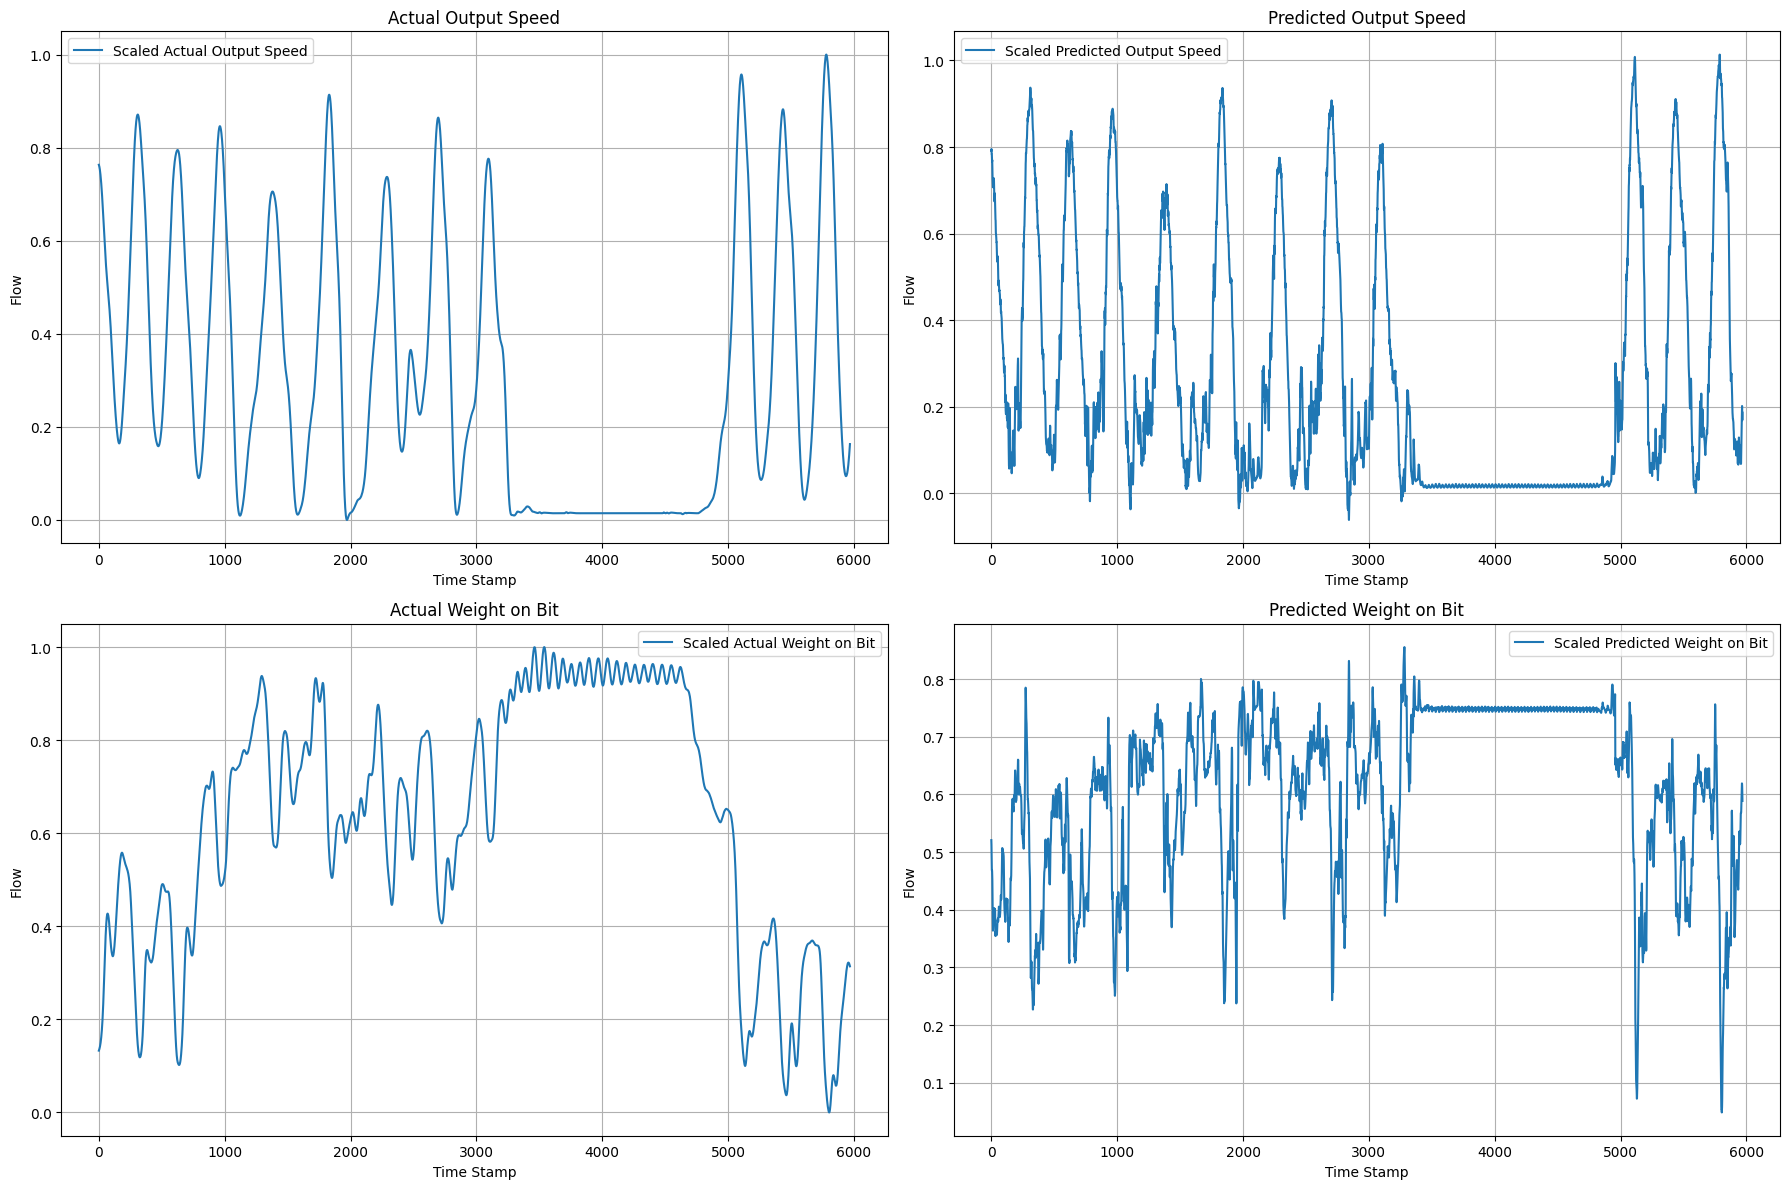

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize predictions and actual values storage
actual_data = []
predicted_data = []

for batch_index, batch in enumerate(test_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)

    with torch.no_grad():
        predicted = model(x_batch).to('cpu').numpy()

    actual_data.append(y_batch.to('cpu').numpy())
    predicted_data.append(predicted)

# Convert lists to numpy arrays for plotting
actual_data = np.concatenate(actual_data, axis=0)
predicted_data = np.concatenate(predicted_data, axis=0)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# First subplot - Actual Output Speed
axs[0, 0].plot(actual_data[:, 0], label='Scaled Actual Output Speed')
axs[0, 0].set_title('Actual Output Speed')
axs[0, 0].set_xlabel('Time Stamp')
axs[0, 0].set_ylabel('Flow')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Second subplot - Predicted Output Speed
axs[0, 1].plot(predicted_data[:, 0], label='Scaled Predicted Output Speed')
axs[0, 1].set_title('Predicted Output Speed')
axs[0, 1].set_xlabel('Time Stamp')
axs[0, 1].set_ylabel('Flow')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Third subplot - Actual Weight on Bit
axs[1, 0].plot(actual_data[:, 1], label='Scaled Actual Weight on Bit')
axs[1, 0].set_title('Actual Weight on Bit')
axs[1, 0].set_xlabel('Time Stamp')
axs[1, 0].set_ylabel('Flow')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Fourth subplot - Predicted Weight on Bit
axs[1, 1].plot(predicted_data[:, 1], label='Scaled Predicted Weight on Bit')
axs[1, 1].set_title('Predicted Weight on Bit')
axs[1, 1].set_xlabel('Time Stamp')
axs[1, 1].set_ylabel('Flow')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()
